# FDA: Formal Data Analysis

## Research Question 1

Is cereal yield significantly associated with fertilizer use and land use?

---

## Model Specification

We fit the following multiple linear regression model:

$$
Yield_i = \beta_0 + \beta_1 Fertilizer_i + \beta_2 Land_i + \epsilon_i,
\quad \epsilon_i \sim N(0, \sigma^2)
$$

Where:

- $Yield_i$ represents cereal yield
- $Fertilizer_i$ represents fertilizer use
- $Land_i$ represents land use
- $\epsilon_i$ is the random error term

---

## Model Estimation

In [2]:
# -----------------------------------------------------------
# Import required libraries
# -----------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# -----------------------------------------------------------
# Load dataset
# -----------------------------------------------------------
data = pd.read_csv("data_2019_2022.csv")

# -----------------------------------------------------------
# Select relevant variables and remove missing values
# -----------------------------------------------------------
df1 = data[["Yield", "Fertilizer", "land"]].dropna()

# -----------------------------------------------------------
# Fit multiple linear regression model
# Yield is the dependent variable
# Fertilizer and land are explanatory variables
# -----------------------------------------------------------
model1 = smf.ols(
    formula="Yield ~ Fertilizer + land",
    data=df1
).fit()

# -----------------------------------------------------------
# Print full regression summary
# -----------------------------------------------------------
print(model1.summary())

# -----------------------------------------------------------
# Extract 95% confidence intervals for coefficients
# -----------------------------------------------------------
conf_intervals = model1.conf_int()
print(conf_intervals)

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           4.72e-53
Time:                        09:14:35   Log-Likelihood:                -1197.6
No. Observations:                 500   AIC:                             2401.
Df Residuals:                     497   BIC:                             2414.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6065      0.315      8.283      0.0

## Interpretation of Results

The multiple linear regression model explains approximately 38.4% of the variation in cereal yield ($R^2 = 0.384$, Adjusted $R^2 = 0.382$). The overall model is statistically significant ($F$-statistic $p < 0.001$), indicating that fertilizer use and land use jointly contribute to explaining variation in yield.

Controlling for land use, fertilizer use is positively associated with cereal yield, with an estimated coefficient of 0.0209 ($p < 0.001$). This suggests that, on average, a one-unit increase in fertilizer use is associated with an increase of 0.0209 units in yield. In contrast, holding fertilizer use constant, land use exhibits a statistically significant negative association with yield (coefficient = −0.0183, $p = 0.001$), implying that an increase in land area is associated with a reduction in average yield. Both coefficients are statistically significant at the 5% level, as their confidence intervals do not include zero.

Diagnostic tests of the residuals (Omnibus and Jarque–Bera) indicate deviations from normality, suggesting the presence of skewness and heavy tails. This may reflect outliers or structural heterogeneity in the data and warrants further robustness checks.

# Model Diagnostics

## Residual Analysis

To assess whether the assumptions of linear regression are reasonably satisfied, residuals are plotted against each explanatory variable. These plots help evaluate linearity and homoscedasticity (constant variance).


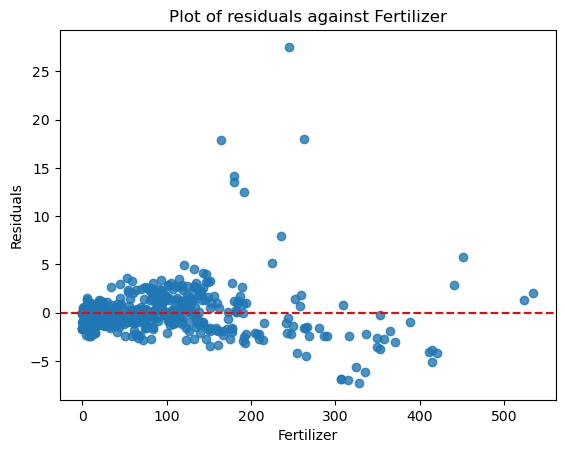

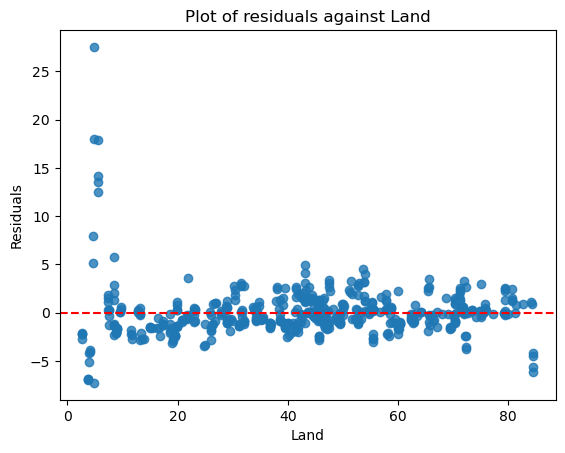

In [5]:
# -----------------------------------------------------------
# Plot of residuals against Fertilizer
# -----------------------------------------------------------

sp1 = sns.regplot(
    x=df1["Fertilizer"],
    y=model1.resid,
    fit_reg=False  # Do NOT draw regression line
)

sp1.set(
    xlabel="Fertilizer",
    ylabel="Residuals",
    title="Plot of residuals against Fertilizer"
)

plt.axhline(y=0, ls="--", color="red")
plt.show()


# -----------------------------------------------------------
# Plot of residuals against Land
# -----------------------------------------------------------

sp2 = sns.regplot(
    x=df1["land"],
    y=model1.resid,
    fit_reg=False  # Do NOT draw regression line
)

sp2.set(
    xlabel="Land",
    ylabel="Residuals",
    title="Plot of residuals against Land"
)

plt.axhline(y=0, ls="--", color="red")
plt.show()



### Interpretation of Residual Plots

The residuals plotted against **Fertilizer** show a generally random dispersion around zero for lower and moderate values, suggesting that the linearity assumption is broadly reasonable. However, a few large positive residuals at higher fertilizer levels may indicate potential outliers or increasing variability.

Similarly, the residuals against **Land** appear mostly centered around zero with no strong systematic pattern, supporting the assumption of linearity. Nevertheless, some extreme observations are visible, which may contribute to the non-normality observed in earlier diagnostic tests.

Overall, while the residual plots do not reveal clear nonlinear trends, the presence of outliers and possible heteroscedasticity suggests that further robustness checks may be warranted.

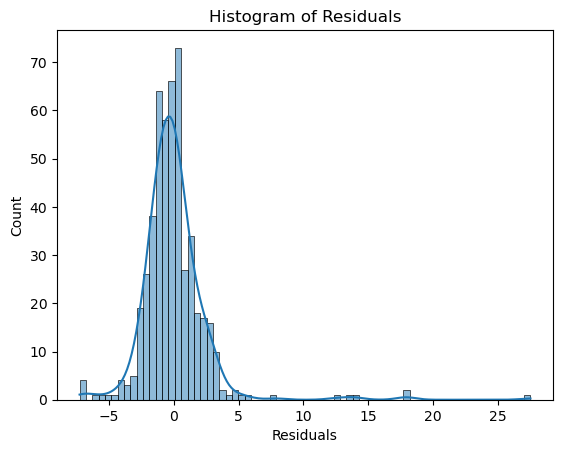

In [35]:
# -----------------------------------------------------------
# Histogram of residuals with KDE curve
# Used to assess approximate normality
# -----------------------------------------------------------
sns.histplot(model1.resid, kde=True)

plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

In [47]:
data[data['Yield']>15]

,Country,Year,Yield,Fertilizer,GDP,region,undernourishment,land
233,Kuwait,2019,17.625400,451.53998,51380.645,Asia,2.5,8.417508
234,Kuwait,2020,15.627201,534.74000,49372.820,Asia,2.5,8.417508
346,Oman,2020,15.341001,235.30000,37560.600,Asia,5.7,4.713829
347,Oman,2021,25.977802,262.96000,38719.457,Asia,5.7,4.737383
348,Oman,2022,35.157200,244.88000,39780.210,Asia,5.7,4.737383
476,United Arab Emirates,2019,23.842302,164.87000,72822.970,Asia,3.3,5.497043
477,United Arab Emirates,2020,18.982700,192.06000,66808.650,Asia,3.1,5.488594
478,United Arab Emirates,2021,19.809200,179.87000,68580.150,Asia,3.4,5.513398
479,United Arab Emirates,2022,20.369802,179.87000,70075.630,Asia,2.7,5.513398


## Residual Distribution and Outliers

The histogram of residuals indicates that most observations are concentrated around zero, suggesting that the model captures the central tendency of the data reasonably well. However, the distribution exhibits clear right-skewness and heavy tails, with several unusually large positive residuals. This deviation from normality is consistent with earlier diagnostic statistics (e.g., Jarque–Bera test), which suggested non-normal residual behaviour.

Inspection of the data reveals that these extreme positive residuals correspond to several Middle Eastern countries, including Kuwait, Oman, and the United Arab Emirates. In particular, Oman (2021–2022) shows exceptionally high yield values relative to its fertilizer and land levels, generating large positive residuals.

These Arab countries therefore appear to behave differently from the overall sample and can be considered potential outliers. Their agricultural production patterns may be driven by structural factors such as irrigation technology, climate conditions, or capital intensity that are not captured by the current model.

While these observations do not necessarily invalidate the model, their influence may distort normality and homoscedasticity assumptions. Robustness checks or sensitivity analysis excluding these countries may therefore be appropriate.

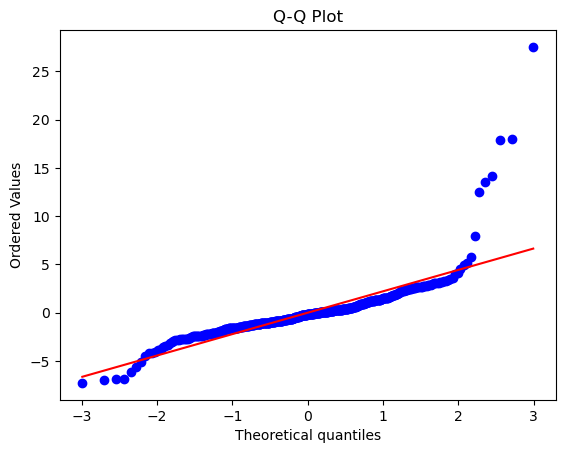

In [36]:
import scipy.stats as stats

# Q-Q plot
stats.probplot(model1.resid, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

## Q–Q Plot Analysis

The Q–Q plot compares the ordered residuals from the regression model with the theoretical quantiles of a normal distribution. If the residuals are normally distributed, the points should lie approximately along the reference line.

In this case, the central portion of the residuals follows the reference line reasonably closely, suggesting approximate normality around the mean. However, substantial deviations are observed in the upper tail, where several points lie far above the line. This indicates the presence of extreme positive residuals and heavy right-tail behaviour.

Similarly, mild deviations in the lower tail suggest some asymmetry. Overall, the Q–Q plot confirms that the residuals are not perfectly normally distributed, primarily due to influential high-yield observations (notably from certain Middle Eastern countries). While moderate departures from normality are often tolerable in large samples, these extreme values may affect inference and warrant further robustness checks.

## Research Question 2

Is undernourishment significantly associated with cereal yield and economic development after accounting for regional differences?

---

## Model Specification

We fit the following multiple linear regression model:

$$
Undernourishment_i 
= \beta_0 
+ \beta_1 Yield_i 
+ \beta_2 GDP_{std,i} 
+ \beta_3 Region_i 
+ \epsilon_i,
\qquad \epsilon_i \sim N(0, \sigma^2)
$$

Where:

- $Undernourishment_i$ represents the prevalence of undernourishment,
- $Yield_i$ represents cereal yield,
- $GDP_{std,i}$ represents standardised GDP,
- $Region_i$ represents categorical regional effects,
- $\epsilon_i$ is the random error term.

---

## Model Interpretation

This model allows us to assess:

- Whether agricultural productivity ($Yield$) is associated with undernourishment;
- Whether economic development ($GDP$) contributes additional explanatory power;
- Whether regional structural differences influence food security outcomes.

By including both productivity and economic variables, the model captures both agricultural and macroeconomic dimensions of undernourishment.

In [6]:
# Filter for Asia, Europe, Africa
df2 = data[
    data["region"].isin(["Asia", "Europe", "Africa"])
][[
    "undernourishment",
    "Yield",
    "region",
    "GDP"
]].dropna()

# Convert Region to categorical variable
df2["region"] = df2["region"].astype("category")

# -----------------------------------------------------------
# Full model: Undernourishment ~ Yield + GDP_std + Region
# -----------------------------------------------------------

model2 = smf.ols(
    "undernourishment ~ Yield + GDP + C(region)",
    data=df2
).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       undernourishment   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           4.57e-65
Time:                        09:17:34   Log-Likelihood:                -1745.4
No. Observations:                 500   AIC:                             3501.
Df Residuals:                     495   BIC:                             3522.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.0508    

## Full Model Results

The full model explains 46.1% of the variation in undernourishment ($R^2 = 0.461$, Adjusted $R^2 = 0.456$) and is statistically significant ($F$-test $p < 0.001$), indicating that the explanatory variables jointly contribute to explaining differences in undernourishment levels.

Regional effects are substantial. Using Africa as the reference category, both Asia and Europe are associated with significantly lower levels of undernourishment. Cereal yield shows a negative and statistically significant association with undernourishment ($p = 0.034$), suggesting that higher agricultural productivity reduces food insecurity. GDP also has a statistically significant negative effect ($p < 0.001$), indicating that higher economic development is linked to lower undernourishment.

To assess whether both Yield and GDP are necessary in the model, reduced models are estimated and compared using AIC and BIC criteria. These criteria balance model fit and complexity; lower values indicate a better model. If removing a variable increases AIC or BIC substantially, the variable contributes meaningful explanatory power and should be retained.

In [52]:
model3 = smf.ols(
    "undernourishment ~ Yield  + C(region)",
    data=df2
).fit()

model4=smf.ols(
    "undernourishment ~ GDP + C(region)",
    data=df2
).fit()



print(model3.summary())

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:       undernourishment   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     133.7
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           1.85e-63
Time:                        12:28:34   Log-Likelihood:                -1751.7
No. Observations:                 500   AIC:                             3511.
Df Residuals:                     496   BIC:                             3528.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              19.8713    

## Reduced Model Comparison

Model 3 (Yield + Region) explains 44.7% of the variation in undernourishment ($R^2 = 0.447$), while Model 4 (GDP + Region) explains 45.6% ($R^2 = 0.456$). Both models remain statistically significant overall ($p < 0.001$), and regional effects are consistently strong across specifications.

In Model 3, Yield is statistically significant and negatively associated with undernourishment. In Model 4, GDP is also highly significant and negatively related to undernourishment. However, when both Yield and GDP are included together in the full model, the p-value of Yield increases (to 0.034), suggesting that part of its explanatory power overlaps with GDP.

This indicates potential multicollinearity between Yield and GDP. Since Model 4 achieves similar explanatory power with fewer variables and its AIC and BIC do not increase substantially compared to the full model, it provides a more parsimonious specification.

Therefore, Model 4 is selected as the final model due to its simplicity, stability, and comparable goodness-of-fit.

## Final Model Specification

Based on model comparison using AIC and BIC criteria, Model 4 is selected as the final specification due to its parsimony and comparable explanatory power.

The final multiple linear regression model is:

$$
Undernourishment_i = \beta_0 + \beta_1 GDP_i + \beta_2 Region_{Asia,i} + \beta_3 Region_{Europe,i} + \varepsilon_i,
\quad \varepsilon_i \sim N(0, \sigma^2)
$$

Where:

- $Undernourishment_i$ represents the percentage of undernourished population in country $i$  
- $GDP_i$ represents gross domestic product  
- $Region_{Asia,i}$ and $Region_{Europe,i}$ are dummy variables (Africa is the reference category)  
- $\varepsilon_i$ is the random error term  

### Interpretation

The model indicates that GDP has a statistically significant negative association with undernourishment, suggesting that higher economic development is associated with lower food insecurity. 

Regional effects remain substantial: relative to Africa, both Asia and Europe exhibit significantly lower levels of undernourishment.

This model achieves a balance between explanatory power and model simplicity, while avoiding potential multicollinearity observed in the full model.

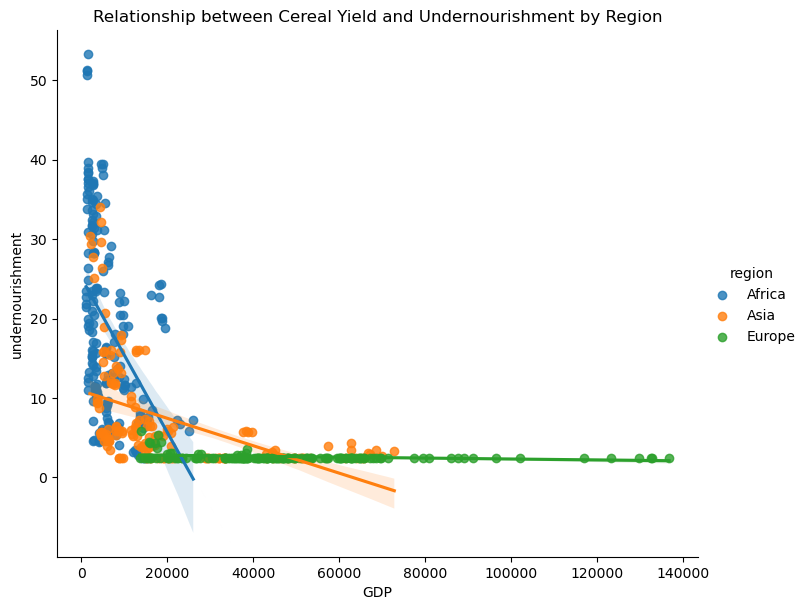

In [39]:
# Scatter plot with regression lines by region
sns.lmplot(
    x="GDP",
    y="undernourishment",
    hue="region",
    data=df2,
    ci=95,
    height=6,
    aspect=1.2
)

plt.title("Relationship between Cereal Yield and Undernourishment by Region")
plt.show()

The fitted regression lines occasionally extend below zero, which is not theoretically meaningful since undernourishment rates cannot be negative. This reflects a limitation of the linear model when applied to bounded percentage data. A transformation or alternative modelling approach (e.g., log or beta regression) may provide a more appropriate specification.

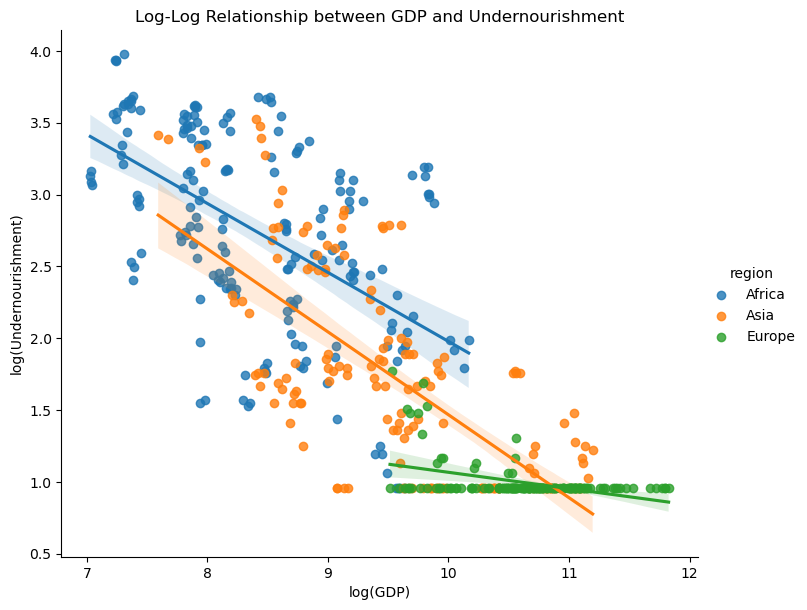

In [9]:
import numpy as np

# Avoid log(0) by adding a very small constant
df2["log_under"] = np.log(df2["undernourishment"] + 0.1)

df2["log_GDP"] = np.log(df2["GDP"])

sns.lmplot(
    x="log_GDP",
    y="log_under",
    hue="region",
    data=df2,
    ci=95,
    height=6,
    aspect=1.2
)

plt.title("Log-Log Relationship between GDP and Undernourishment")
plt.xlabel("log(GDP)")
plt.ylabel("log(Undernourishment)")
plt.show()

## Log-Log Relationship between GDP and Undernourishment

The log-log plot shows a clear negative relationship between GDP and undernourishment across all regions. As log(GDP) increases, log(undernourishment) declines, indicating that higher economic development is associated with lower food insecurity.

The relationship appears approximately linear on the log-log scale, suggesting a multiplicative rather than additive effect. Regional differences remain evident: Africa exhibits higher levels of undernourishment overall, while Europe shows consistently low values across income levels.

Compared to the linear specification, the log transformation produces a more stable pattern and reduces extreme skewness.

## Adjusted Model Specification

Given the bounded and right-skewed nature of undernourishment rates, a log-log specification is adopted:

$$
\log(Undernourishment_i) 
= \beta_0 
+ \beta_1 \log(GDP_i) 
+ \beta_2 Region_{Asia,i} 
+ \beta_3 Region_{Europe,i} 
+ \varepsilon_i,
\quad \varepsilon_i \sim N(0, \sigma^2)
$$

### Interpretation

In this specification, $\beta_1$ measures elasticity:  
a 1% increase in GDP is associated with a $\beta_1$\% change in undernourishment.

This transformation improves model fit, reduces heteroskedasticity, and ensures more realistic predictions.

In [10]:
model_log = smf.ols(
    "log_under ~ log_GDP + C(region)",
    data=df2
).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:              log_under   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     460.5
Date:                Tue, 24 Feb 2026   Prob (F-statistic):          6.57e-143
Time:                        09:18:14   Log-Likelihood:                -346.41
No. Observations:                 500   AIC:                             700.8
Df Residuals:                     496   BIC:                             717.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.6862    

### Log-Log Model Results

The log-log model explains a substantial proportion of the variation in undernourishment ($R^2 = 0.736$, Adjusted $R^2 = 0.734$), indicating a strong model fit. The overall regression is highly statistically significant ($p < 0.001$).

The coefficient on log(GDP) is −0.469 (p < 0.001), suggesting that a 1% increase in GDP is associated with an approximate 0.47% decrease in undernourishment. This elasticity interpretation confirms a strong negative relationship between economic development and food insecurity.

Regional effects remain statistically significant. Relative to Africa (reference category), Asia and Europe exhibit significantly lower undernourishment levels, even after controlling for GDP.

Importantly, diagnostic tests (Jarque–Bera p = 0.557) indicate that residuals are approximately normally distributed, suggesting that the log transformation substantially improves model assumptions compared to the linear specification.

## Assessing model fit 

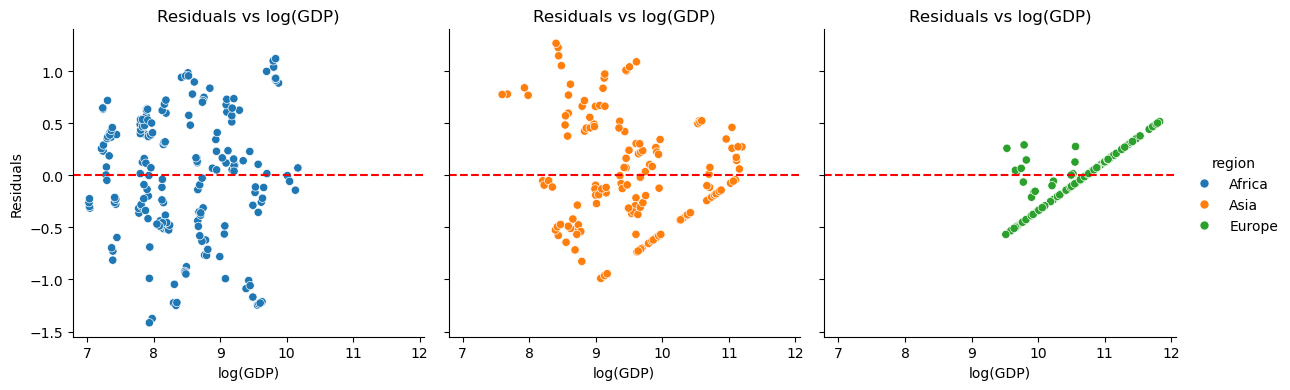

In [17]:
model_log = smf.ols(
    "log_under ~ log_GDP + C(region)",
    data=df2
).fit()

df2["residuals"] = model_log.resid

sp = sns.relplot(
    x=df2["log_GDP"],
    y=df2["residuals"],
    hue=df2["region"],
    col=df2["region"],
    col_wrap=3,
    height=4,
    aspect=1
)

sp.set(
    xlabel="log(GDP)",
    ylabel="Residuals",
    title="Residuals vs log(GDP)"
)

for ax in sp.axes.flat:
    ax.axhline(0, linestyle="--", color="red")
    
plt.show()

### Residual vs log(GDP)

The residual plots by region show that, for Africa and Asia, residuals are randomly scattered around zero with no clear systematic pattern. This suggests that the linearity assumption of the log-log model is reasonably satisfied within these regions.
m
However, the European panel shows a visible upward pattern in residuals, indicating potential model misspecification or insufficient variation in GDP within Europe. The strong linear structure may reflect the narrow GDP range and low variability in undernourishment levels for European countries.

Overall, the residual distribution appears more stable and homoscedastic compared to the original linear specification, supporting the log-log transformation.

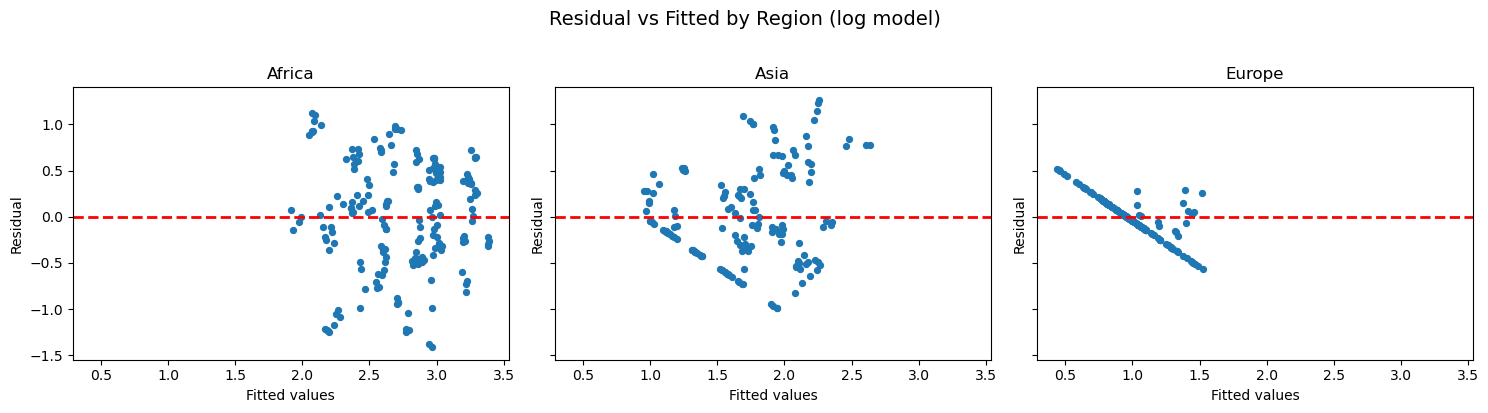

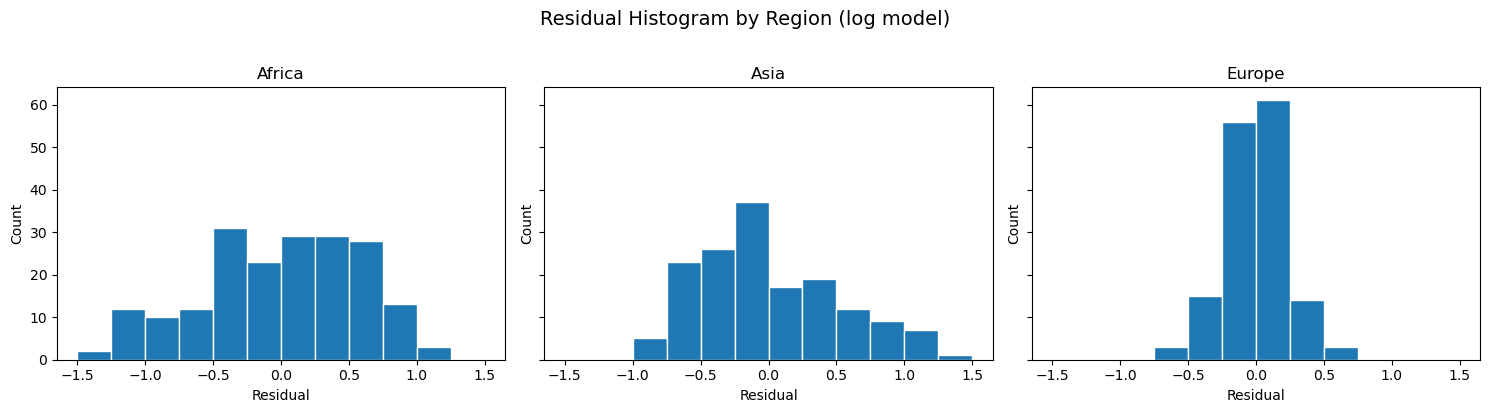

In [16]:
# 1) Fit model
model_log = smf.ols(
    "log_under ~ log_GDP + C(region)",
    data=df2
).fit()

# 2) Prepare plotting df
plot_df = df2.copy()
plot_df["fitted"] = model_log.fittedvalues
plot_df["residual"] = model_log.resid
plot_df["region"] = plot_df["region"].astype("category")

regions = list(plot_df["region"].cat.categories)
k = len(regions)

# -------- Plot A: Residual vs Fitted (faceted by region) --------
ncols = 3  #
nrows = int(np.ceil(k / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), sharex=True, sharey=True)
axes = np.array(axes).reshape(-1)

for i, r in enumerate(regions):
    ax = axes[i]
    sub = plot_df[plot_df["region"] == r]
    ax.scatter(sub["fitted"], sub["residual"], s=18)
    ax.axhline(0, linewidth=2,ls="--", color="red")  # y=0
    ax.set_title(str(r))
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("Residual")


# 
for j in range(i+1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Residual vs Fitted by Region (log model)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# -------- Plot B: Residual histogram (faceted by region) --------
binwidth = 0.25  
res_min, res_max = plot_df["residual"].min(), plot_df["residual"].max()
bins = np.arange(np.floor(res_min/binwidth)*binwidth, np.ceil(res_max/binwidth)*binwidth + binwidth, binwidth)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), sharex=True, sharey=True)
axes = np.array(axes).reshape(-1)

for i, r in enumerate(regions):
    ax = axes[i]
    sub = plot_df[plot_df["region"] == r]
    ax.hist(sub["residual"], bins=bins, edgecolor="white")
    ax.set_title(str(r))
    ax.set_xlabel("Residual")
    ax.set_ylabel("Count")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Residual Histogram by Region (log model)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

### Residual vs Fitted

For Africa, the residuals are approximately randomly distributed around zero with no clear systematic pattern. Although the spread is relatively wide, there is no evident funnel shape, suggesting that heteroscedasticity is not severe and the linearity assumption is reasonably satisfied. In Asia, the residuals exhibit a mild structural pattern with a slight downward trend, which may indicate some degree of non-linearity or potential heteroscedasticity. This suggests that the linear specification may not fully capture the underlying relationship in this region. In contrast, Europe shows a clear downward linear trend in the residuals, which strongly violates the assumption that residuals should be randomly scattered around zero. This pattern indicates systematic model bias, potentially due to missing interaction terms or unmodelled non-linear effects.


### Residual Histogram

For Africa, the residual distribution is approximately symmetric with a slight right skew, and it appears close to normal, making the normality assumption broadly acceptable. In Asia, the histogram shows a mild right skew with a somewhat longer tail, but overall the normality assumption remains reasonably plausible. For Europe, the residuals are more tightly concentrated with smaller variance; however, when considered together with the structured pattern observed in the residual-versus-fitted plot, the histogram reinforces evidence of model misspecification rather than confirming a well-behaved error distribution.

## Conclusion

This study examined two research questions regarding the determinants of cereal yield and undernourishment.

For Research Question 1, cereal yield was found to be significantly associated with fertilizer use and land use. Fertilizer has a positive effect on yield, while land use shows a negative association, suggesting that productivity improvements rather than expansion of cultivated land are more important for increasing output.

For Research Question 2, economic development plays a central role in explaining undernourishment. The log-log model indicates a strong and statistically significant negative elasticity between GDP and undernourishment, meaning that higher income levels are associated with proportionally lower food insecurity. Regional effects remain important, but much of the variation across countries can be explained by differences in economic development.

Overall, the log-transformed specification provides better model fit and more appropriate statistical properties, suggesting that proportional relationships better capture the link between income and food security. The findings highlight that both agricultural productivity and economic development are key drivers of food security outcomes.